# MCT4052 Workshop 2a: Computing and Organizing Features From Database

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

This notebook shows how to handle a database organized as a collection wave files stored in a specific folder, where the file name identifies the label/class of the data.

In this notebook we load all samples included in a folder (one at a time), load the first 400ms of each sample, compute the mean of scalar features (centroid and bandwidth), and organize these in a 2-dimensional array that we can later use for ML training.

Consider having a collection of audio files containing percussive sounds that we want to recognize or classify, in this case the database is a folder containing files which label (type, class) is included in the filename (other types of database will be explored in later notebooks).
For consistency, we consider (i.e load) an equal lenght segment from each file (number of samples).
Assume that the attack is well aligned with the beginning of the file (if not you can fix it manually, or learn hot to use librosa onset detection to get rid of the unwanted part).

Then we compute scalar features on this short audio sample/signal. Librosa will still perform block processing and give you an array of value. To reduce this to a single value we can take the mean. This may not work well in certain cases, so you can consider to work with the entire set of values. In the example we do this for 2 features (bandwidth and centroid).

The goal is to have a data structure (numpy 2-dimensional array, or matrix) as the following, where on each row we store the features of a single file (if you prefer you can organize these on columns).


| centroid_1st_file | bandwidth_1st_file | <br>
| centroid_2nd_file | bandwidth_2nd_file | <br>
| centroid_3rd_file | bandwidth_3rd_file | <br>
.... <br>
| centroid_nth_file | bandwidth_nth_file | <br>

If you read (using np.shape()) the size of this data structure you will get a number of row (as the number of samples, and a number of column as the number of features).

At the end, data will be displayed using a [scatter plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html).

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import os

%matplotlib nbagg
%config IPCompleter.greedy=True

### 1. Loading all files in the folder, one at a time, computing features and orhanizing them in a N-dim array

In [2]:
sr = 48000

#get and display the list of file in the folder
filenames = os.listdir('./data/examples2')
print(filenames)
print(len(filenames))

#computed features will be placed here
#we pre allocated the space (number of rows is as many as the files, number of column is 2)
features = np.zeros((len(filenames),2))
print(features.shape)

#since we want to perform the same operation on all files (one at a time)
#we use a loop (with index "name")
#in this case the name is an element of filenames
#and the loop will stop once it goes through all elements of filenames.
#we also use another integet (idx) that we increment by one unit at a time and it
#will range from 0 to the number of elements in file minus one
#the name and idx are sufficient to implement the minor changes at each iteration,
#these include: selecting another file name (i.e. element from filenames)
#and placing the computed features in a different row of the 
#in the loop there are several print that will help you to understand what is going on.

idx = 0

#iterating 
for name in filenames:
    print('current value of idx',idx)
    print('current value of name',name)
    print('loading sample','./data/examples2/'+name)
    # loading only the first 400ms
    signal, dummy = librosa.load('./data/examples2/'+name, sr, duration=0.4, mono=True)
    
    #compute centroid
    temp = librosa.feature.spectral_centroid(signal)
    
    #temp is a numpy array, so there are plenty of available methods (such as mean() to compute the average)
    #placing this in the right place of the feature N-dim array, i.e. row idx, column 0
    features[idx,0] = temp.mean()
    
    #repeat for bandwidth
    temp = librosa.feature.spectral_bandwidth(signal)
    
    #placing this in the right place of the feature N-dim array, i.e. row idx, column 1
    features[idx,1] = temp.mean()
    
    
    #increment by one
    idx = idx + 1

    
#display the feature N-dim array

print('computed features')
print(features)

print('size of features matrix')
print(np.shape(features))

['snare_28.wav', 'snare_00.wav', 'snare_14.wav', 'snare_15.wav', 'snare_01.wav', 'snare_29.wav', 'snare_17.wav', 'snare_03.wav', 'snare_02.wav', 'snare_16.wav', 'snare_12.wav', 'snare_06.wav', 'clap41.wav', 'clap40.wav', 'snare_07.wav', 'snare_13.wav', 'snare_05.wav', 'snare_11.wav', 'snare_39.wav', 'snare_38.wav', 'snare_10.wav', 'snare_04.wav', 'kick_07.wav', 'kick_13.wav', 'clap30.wav', 'clap24.wav', 'clap18.wav', 'cymbal29.wav', 'cymbal01.wav', 'cymbal15.wav', 'cymbal14.wav', 'cymbal00.wav', 'cymbal28.wav', 'clap19.wav', 'clap25.wav', 'clap31.wav', 'kick_12.wav', 'kick_06.wav', 'kick_10.wav', 'kick_04.wav', 'kick_38.wav', 'clap27.wav', 'clap33.wav', 'cymbal16.wav', 'cymbal02.wav', 'cymbal03.wav', 'cymbal17.wav', 'clap32.wav', 'clap26.wav', 'kick_39.wav', 'kick_05.wav', 'kick_11.wav', 'kick_29.wav', 'kick_15.wav', 'kick_01.wav', 'clap22.wav', 'clap36.wav', 'cymbal13.wav', 'cymbal07.wav', 'cymbal06.wav', 'cymbal12.wav', 'clap37.wav', 'clap23.wav', 'kick_00.wav', 'kick_14.wav', 'kick_

current value of idx 58
current value of name cymbal07.wav
loading sample ./data/examples2/cymbal07.wav
current value of idx 59
current value of name cymbal06.wav
loading sample ./data/examples2/cymbal06.wav
current value of idx 60
current value of name cymbal12.wav
loading sample ./data/examples2/cymbal12.wav
current value of idx 61
current value of name clap37.wav
loading sample ./data/examples2/clap37.wav
current value of idx 62
current value of name clap23.wav
loading sample ./data/examples2/clap23.wav
current value of idx 63
current value of name kick_00.wav
loading sample ./data/examples2/kick_00.wav
current value of idx 64
current value of name kick_14.wav
loading sample ./data/examples2/kick_14.wav
current value of idx 65
current value of name kick_28.wav
loading sample ./data/examples2/kick_28.wav
current value of idx 66
current value of name kick_02.wav
loading sample ./data/examples2/kick_02.wav
current value of idx 67
current value of name kick_16.wav
loading sample ./data/

current value of idx 144
current value of name snare_21.wav
loading sample ./data/examples2/snare_21.wav
current value of idx 145
current value of name snare_35.wav
loading sample ./data/examples2/snare_35.wav
current value of idx 146
current value of name snare_34.wav
loading sample ./data/examples2/snare_34.wav
current value of idx 147
current value of name snare_20.wav
loading sample ./data/examples2/snare_20.wav
current value of idx 148
current value of name snare_08.wav
loading sample ./data/examples2/snare_08.wav
current value of idx 149
current value of name snare_36.wav
loading sample ./data/examples2/snare_36.wav
current value of idx 150
current value of name snare_22.wav
loading sample ./data/examples2/snare_22.wav
current value of idx 151
current value of name cymbal40.wav
loading sample ./data/examples2/cymbal40.wav
current value of idx 152
current value of name cymbal41.wav
loading sample ./data/examples2/cymbal41.wav
current value of idx 153
current value of name snare_23

### 2. Displaying features on a scatter plot

<IPython.core.display.Javascript object>


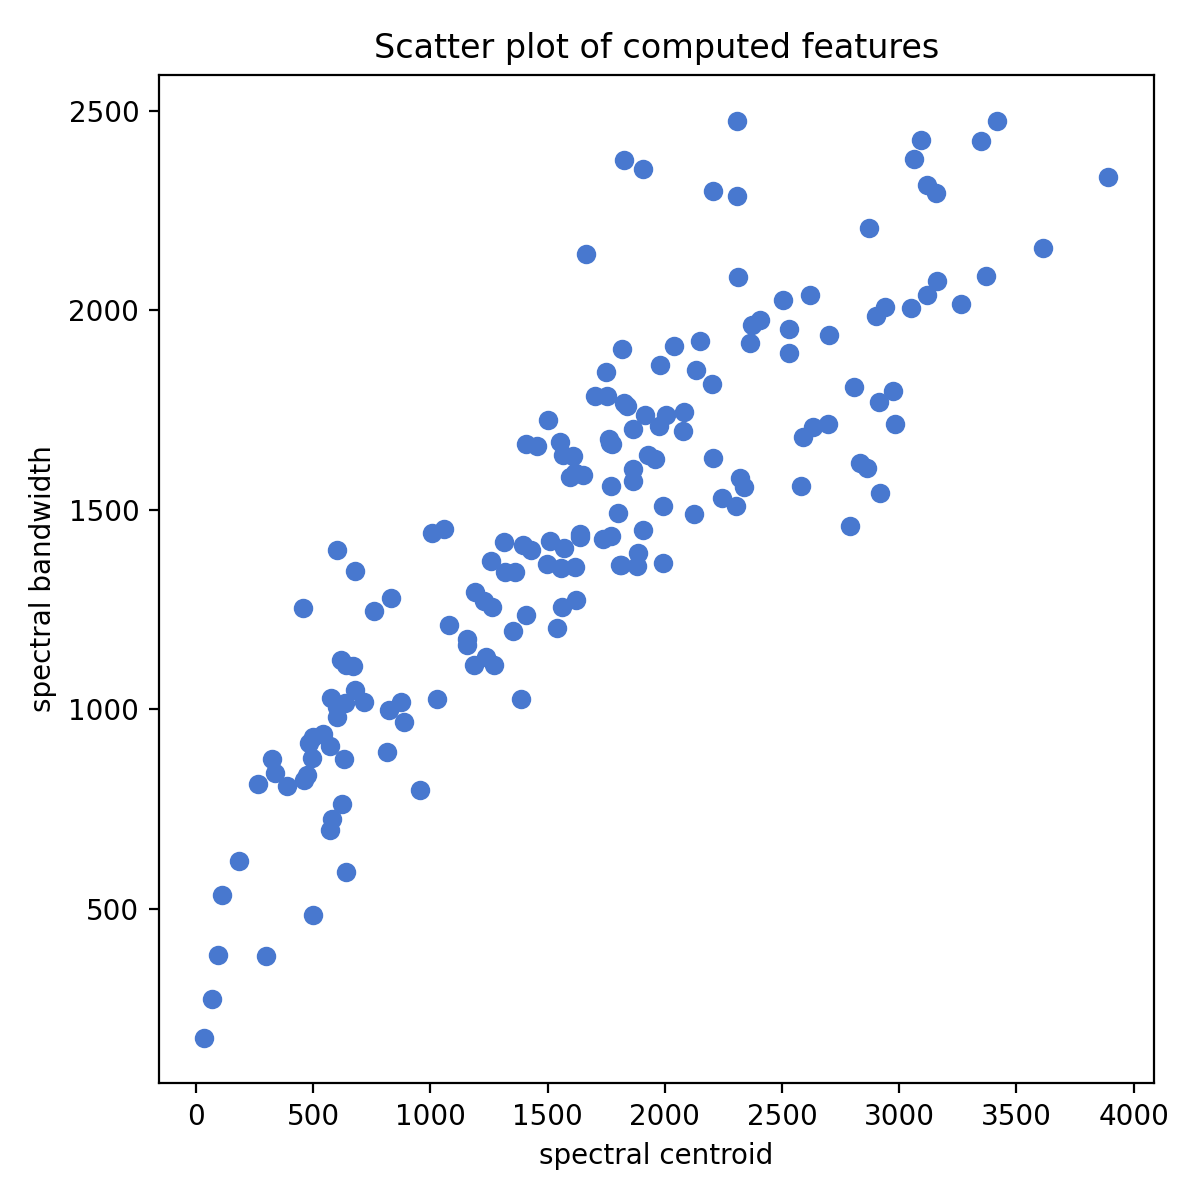

In [3]:
#plotting the features
plt.figure(figsize=(6, 6))

#using the scatter plot create entries (one for each row, i.e. sample)
#each circle is be placed in a position depending by
#centroid (horizontal axis) and bandwidth(vertical axis)
plt.scatter(features[:,0],features[:,1])
plt.title('Scatter plot of computed features')
plt.xlabel('spectral centroid')
plt.ylabel('spectral bandwidth')
plt.tight_layout()

### 3. Follow-up Activities


1. Change the for loop to iterate also on an integer rather than using a manually incremented variable idx 2
2. Compute and organize the features in a separate function you call in the loop
3. Add more features, as well as the variance of each
4. Load the entire file instad of the first 400 milliseconds and decide how to handle the different lenght of the files (refer to Workshop 1).
5. The files in the folder example2 belong to three differen classes, just by looking at the file name, try to generate an array which contains a label (i.e. an integer representing the specific class), which can be used for supervised training. 
6. Color code the circles in the scatter plot according to the specific class.

Check few hints below for 1.,  2., 5., and 6. 

In [ ]:
#hint for 1
for name,idx in zip(filenames,range(0,len(filenames))):

In [ ]:
#hint for 2
def extract_features(signal):

    return [
        np.mean(librosa.feature.zero_crossing_rate(signal)),
        np.mean(librosa.feature.spectral_centroid(signal)),
    ]

In [ ]:
#hint for 5
for name in filenames:
    print('current value of name',name)
    print(name.find('snare'))
    if name.find('kick') != -1:
        print('we got a kick')

In [ ]:
#alternative hint for 5
from pathlib import Path

for p in Path().glob('./data/examples2/kick*.wav'):
    print(p)


In [ ]:
#hint for 6
#idx is the integer associated with the label of each class
plt.scatter(features[(np.where(prediction == idx)), 0],
            features[(np.where(prediction == idx)), 1])